### **Laboratorium ADOM 3 i 5 - ZALICZENIE**
---


Zapronuj metodę filtracji i segmentacji obrazów `cyfry1.png`, `cyfry2.png` i `cyfry3.png`, w wyniku której otrzymasz obraz binarny zawierający wyłącznie cyfry (bez szumu i innych ew. zakłóceń). Metoda powinna poprawnie dokonywać powyższych operacji na każdym z trzech obrazów. Zaimplementuj następnie metodę ekstrakcji pojedynczych znaków (niekoniecznie w kolejności występowania od lewej do prawej). 

In [268]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import cv2
import skimage as si
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

In [269]:
#FUNKCJE POMOCNICZE

# funkcja wyswietlająca obraz kolorowy lub w skali szarości
def pokaz(obraz, tytul = "", osie = False, openCV = True, colmap = 'gray'):
    if not(osie):
        plt.axis("off") 
    if obraz.ndim == 2:
        plt.imshow(obraz,cmap = colmap)
    else:
        if openCV:
            plt.imshow(cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(obraz,interpolation = 'none')
    plt.title(tytul)

def polob(listaobr, ile_k = 1, listatyt = [], openCV = True, wart_dpi = 100, osie = False, colmap = 'gray'):
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i],listatyt[i],osie,openCV, colmap)
    plt.show()

In [264]:
def ekstrakcja(nazwa):
    wejscie = cv2.imread(nazwa, 0)
    _, binarny = cv2.threshold(wejscie,150,255,cv2.THRESH_BINARY_INV)
    etykiety = sime.label(binarny)
    lista_znakow = []
    for i in range(1,21):
        lista_znakow.append(etykiety == i)
    polob(lista_znakow, len(lista_znakow))

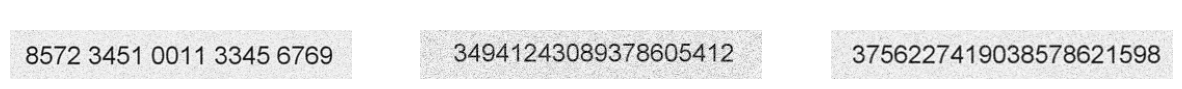

In [232]:
# obróbka wstępna (filtracja i segmentacja) obrazów (miejsce na kod)
cyf1 = cv2.imread('cyfry1.png', 0)
cyf2 = cv2.imread('cyfry2.png', 0)
cyf3 = cv2.imread('cyfry3.png', 0)
wejscie = [cyf1, cyf2, cyf3]
polob(wejscie, 3)

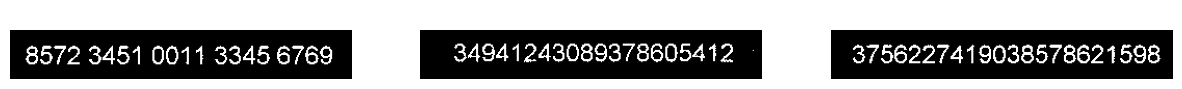

In [233]:
_, binarny1 = cv2.threshold(cyf1,150,255,cv2.THRESH_BINARY_INV)
_, binarny2 = cv2.threshold(cyf2,150,255,cv2.THRESH_BINARY_INV)
_, binarny3 = cv2.threshold(cyf3,150,255,cv2.THRESH_BINARY_INV)
wyjscie = [binarny1, binarny2, binarny3]
polob(wyjscie, 3)

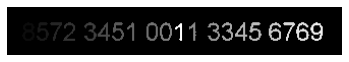

In [234]:
etykiety1 = sime.label(binarny1)
pokaz(etykiety1)

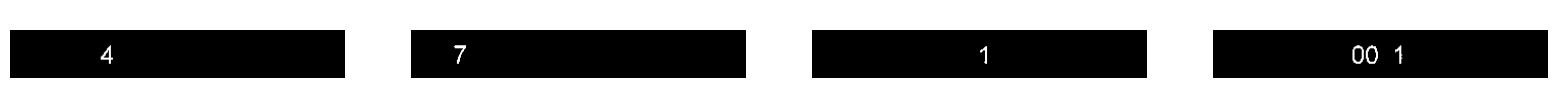

In [270]:
 polob([etykiety1 == 6, etykiety1 == 3, etykiety1 == 20, np.where((etykiety1 < 12) & (etykiety1 > 8),255,0)],5)

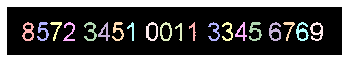

In [271]:
# kolorowe etykiety nałożone na obraz początkowy
kolorowy = sic.label2rgb(etykiety1, image=binarny1, bg_label=0)
pokaz(kolorowy, openCV = False)

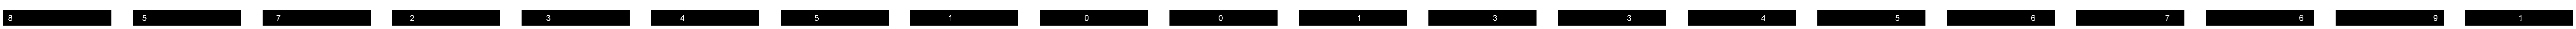

In [272]:
# ekstrakcja pojedynczych znaków (miejsce na kod)
lista_znakow = []
for i in range(1,21):
    lista_znakow.append(etykiety1 == i)
polob(lista_znakow, len(lista_znakow))

Testowanie napisanej funkcji dla wszystkich 3 obrazów

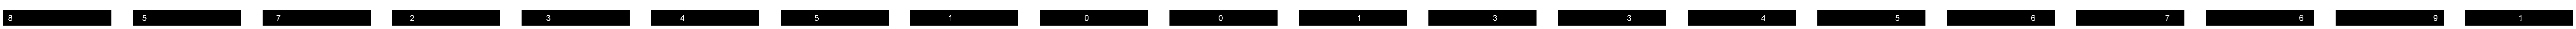

In [277]:
ekstrakcja('cyfry1.png')

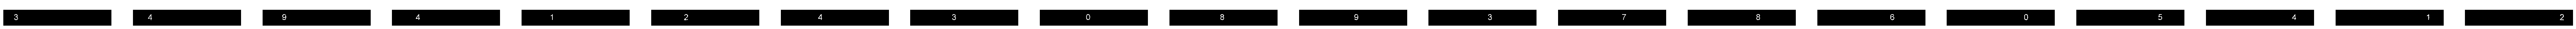

In [278]:
ekstrakcja('cyfry2.png')

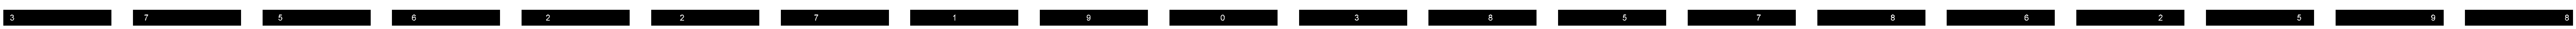

In [279]:
ekstrakcja('cyfry3.png')

Obraz `cyfry.png` zawiera 10 kolejnych cyfr od 0 do 9. Wyznacz cechy tych obiektów, napisz fragment kodu umożliwiający selekcję obiektów według wybranej cechy i spróbuj znaleźć zestaw cech, który umożliwiłby rozóżnienie tych cyfr. 

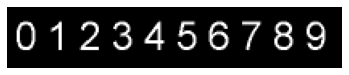

In [238]:
cyfry = cv2.imread('cyfry.png', 0)
pokaz(cyfry)

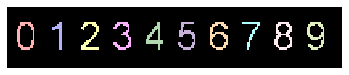

In [239]:
_, binarny = cv2.threshold(cyfry,110,255,cv2.THRESH_BINARY)
etykiety = sime.label(binarny)
#wizualizacja etykiet
kolorowy = sic.label2rgb(etykiety, image=binarny, bg_label=0)
pokaz(kolorowy, openCV = False)


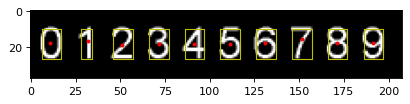

In [240]:
# ekstrakcja cech (miejsce na kod)
cechy = sime.regionprops(etykiety)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(cyfry, cmap=plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize=5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth=1)
plt.show()

In [283]:
# wygenerowanie wartości cech dla kolejnych etykiet, wybrane properties z dokumentacji
props = sime.regionprops_table(etykiety, cyfry, properties = ['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity', 'euler_number', 'extent', 'filled_area', 'eccentricity', 'major_axis_length', 'minor_axis_length'])

In [284]:
import pandas as pd
df = pd.DataFrame(props)
print(df)

   label  area  equivalent_diameter  mean_intensity  solidity  euler_number  \
0      1    72                 9.57          243.61      0.42             0   
1      2    43                 7.40          249.28      0.62             1   
2      3    71                 9.51          243.45      0.39             1   
3      4    66                 9.17          235.12      0.39             1   
4      5    60                 8.74          248.17      0.50             0   
5      6    68                 9.30          238.12      0.42             1   
6      7    78                 9.97          240.28      0.45             0   
7      8    39                 7.05          240.28      0.36             1   
8      9    84                10.34          238.40      0.50            -1   
9     10    79                10.03          238.39      0.48             0   

   extent  filled_area  eccentricity  major_axis_length  minor_axis_length  
0    0.39          164          0.74              22.

In [244]:
#Grupowanie ze względu na pole
index = df.index
condition = df['area'] > 70
area_indices = index[condition]
area_indices_list = area_indices.tolist()
print(area_indices_list)

[0, 2, 6, 8, 9]


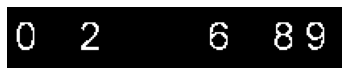

In [245]:
pokaz(np.where((np.isin(etykiety, area_indices_list + np.array(1))),255,0))

In [246]:
#Grupowanie ze względu na mimośród (im blizej 0 tym bardziej okrągłe) oraz pole
index = df.index
condition = (df.eccentricity < 0.85) & (df.area > 70)
eccentricity_indices = index[condition]
eccentricity_indices_list = eccentricity_indices.tolist()
print(eccentricity_indices_list)

[0, 6, 8, 9]


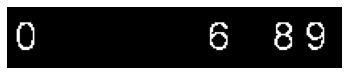

In [228]:
pokaz(np.where((np.isin(etykiety, eccentricity_indices_list + np.array(1))),255,0))

In [286]:
#Grupowanie ze wzgledu na liczbe Eulera 0
index = df.index
condition = (df.euler_number == 0)
euler_0 = index[condition]
euler_0_list = euler_0.tolist()
print(euler_0_list)

[0, 4, 6, 9]


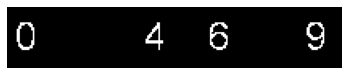

In [287]:
pokaz(np.where((np.isin(etykiety, euler_0_list + np.array(1))),255,0))

In [289]:
#Grupowanie ze wzgledu na liczbe Eulera 1
index = df.index
condition = (df.euler_number == 1)
euler_1 = index[condition]
euler_1_list = euler_1.tolist()
print(euler_1_list)

[1, 2, 3, 5, 7]


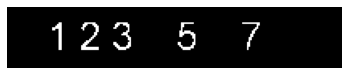

In [290]:
pokaz(np.where((np.isin(etykiety, euler_1_list + np.array(1))),255,0))

WNIOSKI AD1
* Aby funkcja działała na wszystkich obrazkach potrzeba było wybrać odpowiedni próg progowania, aby uniknąć szumów i aby zapewnić odpowiednią dokładność thresholdingu

WNIOSKI AD2
* Samo etykietowanie przebiegło bez problemu, lista dostępnych parametrów dla wybranych cech jest dostępna w dokumentacji https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
* Odpowiednie połączenia warunków wybranych cech pozwala na wyselekcjonowanie, wysegmentowanie odpowiednich cyfr, na przykład wiadomo, że cyfra 1 oraz cyfra 7 są węższe i bounding box ograniczający cyfrę będzie miał mniejszą szerokość.

---
---
Historia zmian:
* wersja r.akad 20/21: 9.11.2020 (MI)
* wersja r.akad 21/22: 23.11.2021 (MI)